In [30]:
import numpy as np
from numpy import *
import pandas as pd
import os
os.chdir('../../STAT628')

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

In [2]:
df_bustrain = pd.read_csv('bussiness_train_version3.csv',index_col=0)
df_reviewrd = pd.read_csv('review_randomsel.csv',index_col=0)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
df_idstars_ = df_reviewrd.iloc[:,[0,2]]
df_bustrain_ = df_bustrain.iloc[:,0:8]

In [25]:
df_idstars_.head(5)

,business_id,stars
7612,96440,1.0
3896,41217,4.0
888,19062,4.0
1208,71026,4.0
4646,108514,3.0


In [18]:
df_bustrain_.shape

(154606, 8)

In [23]:
df_merge = df_idstars_.merge(df_bustrain_, how = 'left',on = 'business_id')

In [28]:
df_merge.head(10)

,business_id,stars,name,city,state,postal_code,latitude,longitude,is_open
0,96440,1.0,Ninja Japanese Restaurant,Chandler,AZ,85224,33.339990,-111.860119,1
1,41217,4.0,RC Willey,Henderson,NV,89074,36.031284,-115.044422,1
2,19062,4.0,Bradley Ogden,Las Vegas,NV,89109,36.116219,-115.174572,0
3,71026,4.0,Tottie's Asian Fusion,Scottsdale,AZ,85251,33.479491,-111.910723,1
4,108514,3.0,Lucki Thai,Las Vegas,NV,89183,36.011985,-115.153599,1
5,42099,5.0,Pretty Ugly,Toronto,ON,M6K 1L4,43.641689,-79.430349,1
6,3523,3.0,Hertz Rent A Car,Las Vegas,NV,89119,36.060089,-115.164164,1
7,25671,1.0,Sheraton Crescent Hotel,Phoenix,AZ,85021,33.568515,-112.115747,1
8,75298,2.0,Johnny Rockets,Las Vegas,NV,89119,36.090224,-115.176439,1
9,34473,4.0,Five Guys,Las Vegas,NV,89135,36.144942,-115.332838,1


In [124]:
color = sns.color_palette()
sns.set_style('darkgrid')


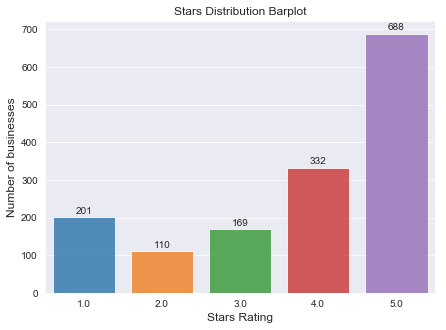

In [135]:
stars = df_merge['stars'].value_counts()
stars = stars.sort_index(ascending=False)
stars = df_merge['stars'].value_counts()
stars = stars.sort_index()
plt.figure(figsize=(7,5))
stars_bar = sns.barplot(stars.index, stars.values,  saturation=0.85,alpha=0.8)
plt.title("Stars Distribution Barplot")
plt.ylabel('Number of businesses', fontsize=12)
plt.xlabel('Stars Rating', fontsize=12)

rects = stars_bar.patches
labels = stars.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    stars_bar.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

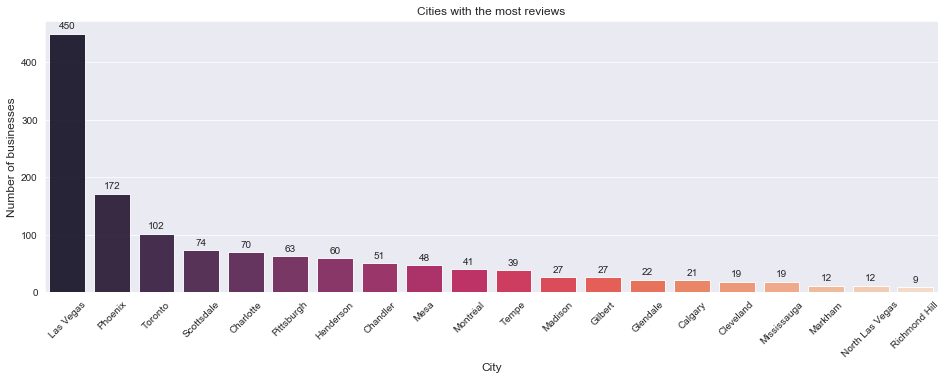

In [137]:
cities = df_merge['city'].value_counts()
cities=cities.sort_values(ascending=False)
cities=cities.iloc[0:20]
plt.figure(figsize=(16,5))
cities_bar = sns.barplot(cities.index, cities.values, palette="rocket", saturation=0.9,alpha=0.9)
plt.title("Cities with the most reviews")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('Number of businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = cities_bar.patches
labels = cities.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    cities_bar.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

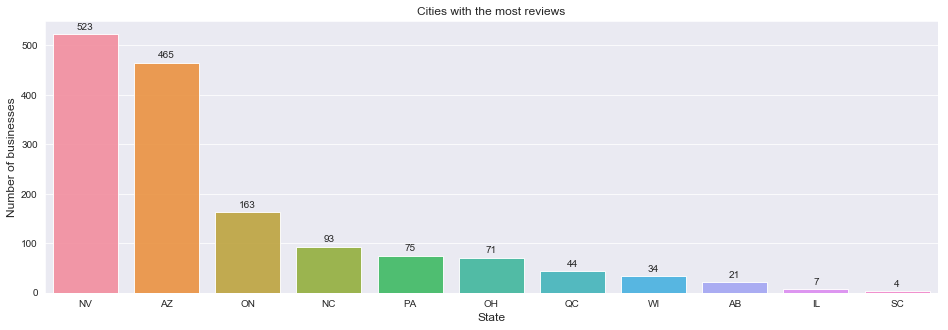

In [140]:
states = df_merge['state'].value_counts()
states=states.sort_values(ascending=False)
states=states.iloc[0:20]
plt.figure(figsize=(16,5))
states_bar = sns.barplot(states.index, states.values, saturation=0.9,alpha=0.9)
plt.title("Cities with the most reviews")
locs, labels = plt.xticks()
plt.ylabel('Number of businesses', fontsize=12)
plt.xlabel('State', fontsize=12)

#adding the text labels
rects = states_bar.patches
labels = states.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    states_bar.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()